# Анализ данных транзакций

В данном ноутбуке будет проведен анализ данных  с целью выявления фрода. Действуем по модели ETL:
- Extract (извлечение данных)
- Transform (Обработка и визуализация)
- Load (Выходные данные)

## Содержание <a class="anchor" id="содержание"></a>
* [Extract](#extract)
* [Transform](#transform)
    * [Подготовка](#transform-подготовка)
    * [Анализ](#transform-анализ)
* [Load](#load)

## Часть первая - Extract <a class="anchor" id="extract"></a>

* [к содержанию](#содержание)

In [1]:
# импортируем библиотеки
import pandas as pd # работа с данными
import numpy as np # работа с вычислениями
import json # парсинг json файлов
# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

Распакуем json файл и поместим его в Pandas.DataFrame

In [2]:
# из-за структуры файла сразу в pandas запихнуть не получится, поэтому требуется первичная обработка
with open('transactions.json') as raw_json:
    content = json.load(raw_json)
    content1 = content['transactions']

content1

{'459270924': {'date': '2020-05-01T00:00:29',
  'card': '59649132026167121328',
  'account': '40817810000001139973',
  'account_valid_to': '2036-01-16T00:00:00',
  'client': '3-95179',
  'last_name': 'Мисик',
  'first_name': 'Сергей',
  'patronymic': 'Николаевич',
  'date_of_birth': '1938-06-25T00:00:00',
  'passport': 7076445954,
  'passport_valid_to': '2022-11-09T00:00:00',
  'phone': '+79497481039',
  'oper_type': 'Пополнение',
  'amount': 31576.6,
  'oper_result': 'Отказ',
  'terminal': 'POS43792',
  'terminal_type': 'POS',
  'city': 'Славянск-на-Кубани',
  'address': 'Славянск-на-Кубани, ул. Клецкая, д. 86'},
 '459270943': {'date': '2020-05-01T00:02:46',
  'card': '54236863445669263724',
  'account': '40817810000006468175',
  'account_valid_to': '2033-11-15T00:00:00',
  'client': '8-33140',
  'last_name': 'Ачентов',
  'first_name': 'Антон',
  'patronymic': 'Дмитриевич',
  'date_of_birth': '1960-08-04T00:00:00',
  'passport': 6403074379,
  'passport_valid_to': '2030-09-13T00:00:00'

In [3]:
transactions_df = pd.DataFrame.from_dict(content1, orient='index') # преобразование в dataframe

In [4]:
transactions_df.head(10) # посмотрим первые 10 строк датафрейма, чтобы убедиться, что json распознан правильно

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
459270924,2020-05-01T00:00:29,59649132026167121328,40817810000001139973,2036-01-16T00:00:00,3-95179,Мисик,Сергей,Николаевич,1938-06-25T00:00:00,7076445954,2022-11-09T00:00:00,+79497481039,Пополнение,31576.60,Отказ,POS43792,POS,Славянск-на-Кубани,"Славянск-на-Кубани, ул. Клецкая, д. 86"
459270943,2020-05-01T00:02:46,54236863445669263724,40817810000006468175,2033-11-15T00:00:00,8-33140,Ачентов,Антон,Дмитриевич,1960-08-04T00:00:00,6403074379,2030-09-13T00:00:00,+79458324907,Пополнение,60041.10,Отказ,POS75616,POS,Пустошка,"Пустошка, ул. Цюрупинская, д. 78"
459270968,2020-05-01T00:05:14,45930894029725313464,40817810000009142118,2029-03-18T00:00:00,4-72043,Гуляков,Евгений,Константинович,1989-08-15T00:00:00,3354134791,2021-06-24T00:00:00,+79953939977,Снятие,18474.46,Успешно,POS28311,POS,Петровск-Забайкальский,"Петровск-Забайкальский, ул. Тагильская, д. 38"
459271057,2020-05-01T00:07:05,47550893546403715714,40817810000005559732,2028-04-01T00:00:00,1-85045,Гуляков,Кирилл,Петрович,1996-09-18T00:00:00,4783507057,2023-01-08T00:00:00,+79698158422,Пополнение,915.26,Успешно,ATM39555,ATM,Краснослободск,"Краснослободск, ул. Фогеля, д. 20"
459271064,2020-05-01T00:08:27,53036257457049008830,40817810000007495265,2037-10-26T00:00:00,5-77607,Мисик,Сергей,Олегович,1992-05-08T00:00:00,3195562178,2032-09-27T00:00:00,+79181011177,Оплата,75843.91,Отказ,ATM16730,ATM,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
459271161,2020-05-01T00:09:16,42810999157069197448,40817810000003762026,2027-07-04T00:00:00,6-78748,Сноркин,Андрей,Антонович,1984-11-20T00:00:00,3602724796,2035-10-16T00:00:00,+79890926038,Оплата,52415.15,Успешно,POS64475,POS,Вичуга,"Вичуга, ул. Котляревского, д. 100"
459271162,2020-05-01T00:09:59,45080063716602427656,40817810000006914392,2032-06-08T00:00:00,6-40096,Ачентов,Владимир,Александрович,1943-06-19T00:00:00,6183431135,2040-12-09T00:00:00,+79943917322,Снятие,39265.25,Успешно,POS64475,POS,Вичуга,"Вичуга, ул. Котляревского, д. 100"
459271163,2020-05-01T00:11:37,59545483119724056521,40817810000001617265,2031-03-10T00:00:00,7-29452,Мисик,Андрей,Константинович,1950-09-10T00:00:00,9054168281,2031-01-17T00:00:00,+79652111522,Снятие,17880.89,Отказ,ATM90761,ATM,Морозовск,"Морозовск, ул. Васильковая, д. 13"
459271164,2020-05-01T00:13:49,42388100783866617513,40817810000001005464,2039-11-23T00:00:00,6-14693,Гладишкин,Александр,Михаилович,1996-01-13T00:00:00,7004798931,2035-05-26T00:00:00,+79239086361,Снятие,46074.67,Отказ,POS45875,POS,Воронеж,"Воронеж, ул. Раевского Николая, д. 22"
459271165,2020-05-01T00:14:48,43440125275047901246,40817810000005508931,2033-11-06T00:00:00,5-15302,Поджарый,Роман,Александрович,1951-07-24T00:00:00,7173036990,2036-08-05T00:00:00,+79343500689,Оплата,41054.44,Успешно,POS20393,POS,Тара,"Тара, ул. Уральская, д. 39"


## Часть вторая - Transform <a class="anchor" id="transform"></a>

* [к содержанию](#содержание)

### Обработка/подготовка к анализу <a class="anchor" id="transform-подготовка"></a>

* [к содержанию](#содержание)

Проведем проверку уникальных/пустых значений в нашем датасете и очистим его от ненужных данных

In [5]:
# проверка на пустые значения
transactions_df.isna().any()

date                 False
card                 False
account              False
account_valid_to     False
client               False
last_name            False
first_name           False
patronymic           False
date_of_birth        False
passport             False
passport_valid_to    False
phone                False
oper_type            False
amount               False
oper_result          False
terminal             False
terminal_type        False
city                 False
address              False
dtype: bool

Пустых значений нет => меньше ступеней в обработке данных

In [6]:
# проверка на уникальные значения номеров кард, акков, id клиентов, сумма денег
columns_for_check = ['card', 'account', 'client', 'amount']
print('Уникальные значения в колонках:')
for column in columns_for_check:
    len_of_unique_values = len(pd.unique(transactions_df[column]))
    len_of_the_column = len(transactions_df[column])
    print(f"Длина колонки - {len_of_the_column}; количество уникальных значений - {len_of_unique_values}")
    print(f"{column} - {'все уникальные' if len_of_the_column - len_of_unique_values == 0 else 'есть одинаковые'}")
    print()

Уникальные значения в колонках:
Длина колонки - 4471; количество уникальных значений - 4192
card - есть одинаковые

Длина колонки - 4471; количество уникальных значений - 4192
account - есть одинаковые

Длина колонки - 4471; количество уникальных значений - 1100
client - есть одинаковые

Длина колонки - 4471; количество уникальных значений - 4470
amount - есть одинаковые



Есть повторяющиеся номера клиентов и аккаунтов/кард => дополнительные гипотезы для определения фрода

Нет сильно повторяющихся значений сумм транзакций => признаки фродв по суммам транзакций кажутся бессмысленными, но со счетов не сбрасываем пока


In [7]:
# избавимся от ненужных данных и оставим следующие данные:
# - дата и время операции
# - номер клиента
# - сумма средств в операции
# - город

df_for_analysis = transactions_df.loc[:, ['client', 'amount', 'city']]
transaction_dates = pd.to_datetime(transactions_df.loc[:, 'date'], format='%Y-%m-%dT%H:%M:%S')
df_for_analysis['date and time'] = transaction_dates
df_for_analysis

,client,amount,city,date and time
459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29
459270943,8-33140,60041.10,Пустошка,2020-05-01 00:02:46
459270968,4-72043,18474.46,Петровск-Забайкальский,2020-05-01 00:05:14
459271057,1-85045,915.26,Краснослободск,2020-05-01 00:07:05
459271064,5-77607,75843.91,Черкесск,2020-05-01 00:08:27
...,...,...,...,...
459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12
459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46
459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07
459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48


In [8]:
df_for_analysis.dtypes

client                   object
amount                  float64
city                     object
date and time    datetime64[ns]
dtype: object

### Анализ   <a class="anchor" id="transform-анализ"></a>

* [к содержанию](#содержание)

Нужно найти паттерны фрода. Проверим следующие гипотезы:
- фрод-операции происходят в необычное время, например ночью
- фрод-операции происходят очень часто за день
- фрод-операции происходят в необычной локации
- фрод-операции происходят с необычными суммами

Пометка: необычные - отклонение от среднего/медианы

__Начнем с первой гипотезы__

204


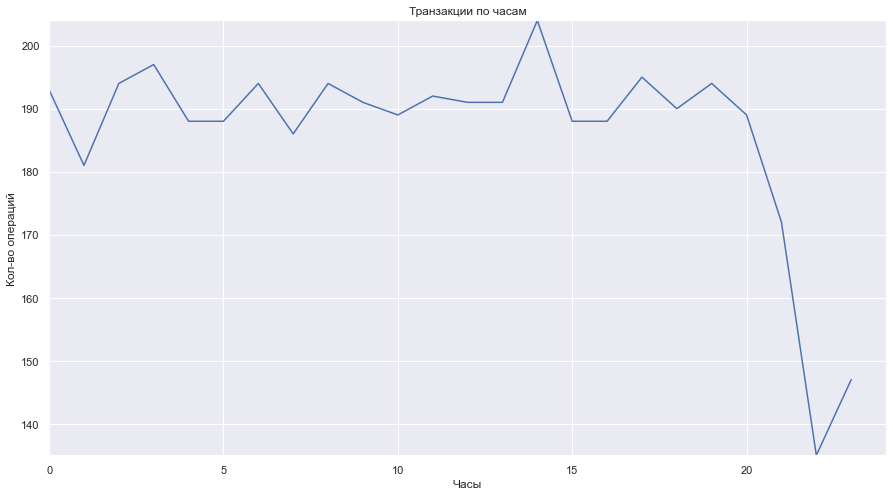

In [9]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8)})
transaction_times = df_for_analysis['date and time'].dt.strftime('%H').astype(np.int64).value_counts().sort_index()
print(transaction_times.max())
sns.lineplot(data=transaction_times)
plt.xlabel("Часы")
plt.ylabel("Кол-во операций")
plt.title("Транзакции по часам")
plt.ylim(transaction_times.min(),transaction_times.max())
plt.xlim(0, 24)
plt.show()

Судя по графику большая часть операций совершаются с 0 до 20 часов, самые непопулярные с 20 до 24 часов, а значит потенциально фрод

__Переходим ко второй гипотезе__

In [10]:
client_transaction_frequency = df_for_analysis.groupby(['client', df_for_analysis['date and time'].dt.strftime('%Y-%m-%d')])
med = client_transaction_frequency.count().median()[0] # медианное количесвтво операций клиентов
freq_df = client_transaction_frequency.count()['amount'].to_frame()
freq_df

amount
client  date and time        
1-00222 2020-05-05          3
1-00477 2020-05-04          1
1-00799 2020-05-04          1
1-01108 2020-05-05          3
1-01287 2020-05-04          1
...                       ...
9-98099 2020-05-02          5
        2020-05-03          8
9-98591 2020-05-04          1
9-98835 2020-05-04          1
9-99014 2020-05-04          1

[1301 rows x 1 columns]

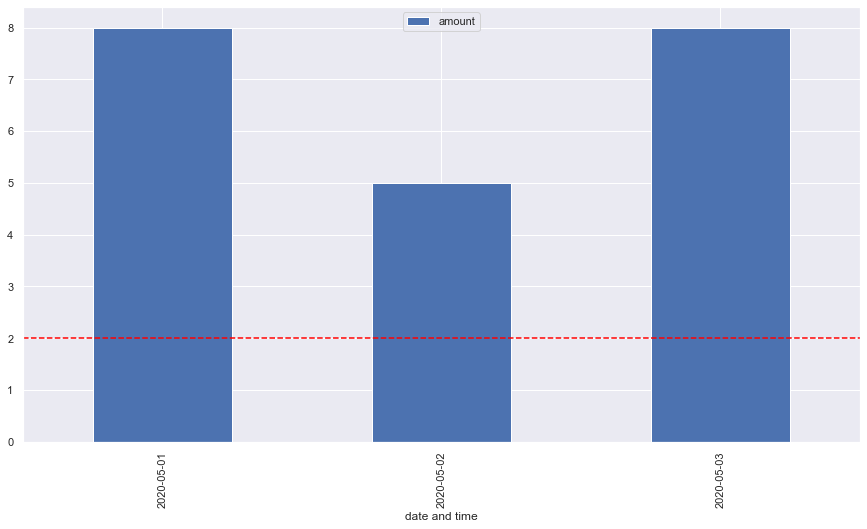

In [11]:
# пример визуализации
# clients = df_for_analysis['client'].unique()
# number_of_clients = len(df_for_analysis['client'].unique())
# f, a = plt.subplots(number_of_clients, 1)
# for client, plot_num in zip(clients, range(number_of_clients)):
freq_df.xs('9-98099').plot(kind='bar')
plt.axhline(y=med, color='red', linestyle='--')

Предположение - если среднее количество операций гораздо выше медианы операций клиентов, то фрод

__Третья гипотеза пошла__

In [12]:
transaction_location = df_for_analysis.groupby(['client', 'city'])
tr_loc = transaction_location.count()['amount'].to_frame()
tr_loc

amount
client  city               
1-00222 Почеп             3
1-00477 Белокуриха        1
1-00799 Нарткала          1
1-01108 Лагань            3
1-01287 Зима              1
...                     ...
9-98099 Цимлянск          1
        Шиханы            1
9-98591 Черкесск          1
9-98835 Чита              1
9-99014 Лениногорск       1

[3429 rows x 1 columns]

In [13]:
tr_loc.xs('9-98099')

,amount
city,
Белая Калитва,1
Гусев,1
Димитровград,1
Кировград,1
Котлас,2
Красноуфимск,1
Лениногорск,1
Ленинск,3
Михайловка,1


<AxesSubplot:xlabel='city'>

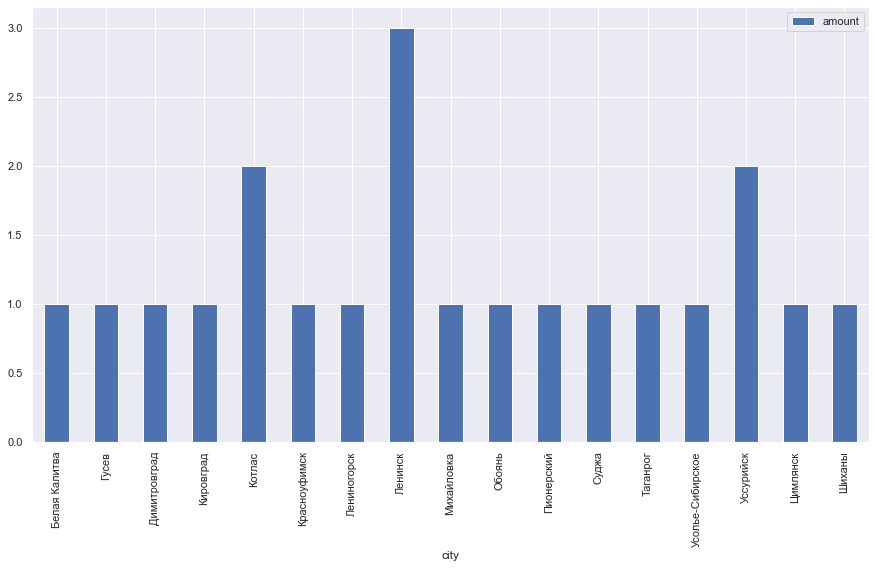

In [14]:
tr_loc.xs('9-98099').plot(kind='bar')

Если операции клиента в разных городах, то есть подозрение на фрод

__Четвертая гипотеза__

In [15]:
amount_transaction = df_for_analysis.groupby(['client', df_for_analysis['date and time'].dt.strftime('%Y-%m-%d')])
median = amount_transaction['amount'].mean().median()
am_tr = amount_transaction['amount'].sum().to_frame()

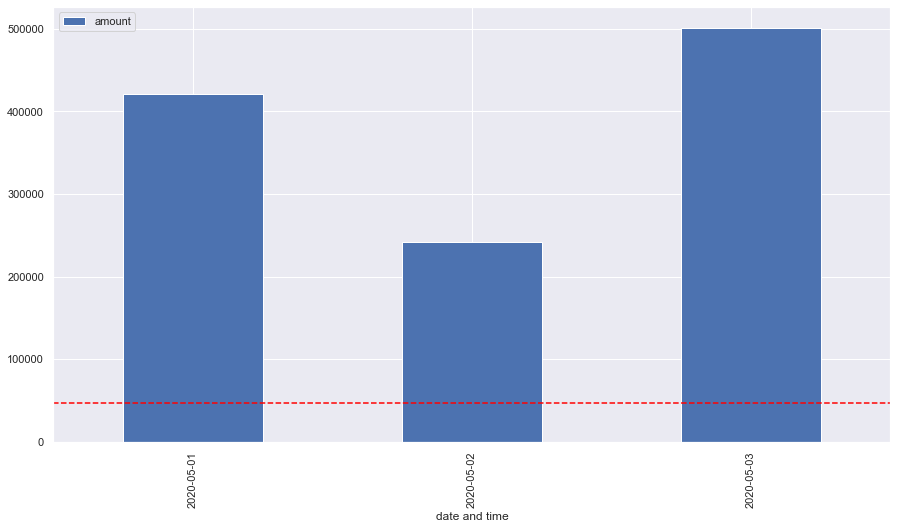

In [16]:
am_tr.xs('9-98099').plot(kind='bar')
plt.axhline(y=median, color='red', linestyle='--')

Беря в расчет здравый смысл, среднюю лучше рассчитывать для каждого и смотреть отклонение

Но в принципе признак суммы транзакции не является первостепенным, скорее таким признаком, который может разрешить спорный момент, когда операция может быть фродом, а может быть и нет

# Часть третья - Load <a class="anchor" id="load"></a>

* [к содержанию](#содержание)

Для получения фрод операций будет применена система признаков: клиент, операции которого соответствуют 3-4 признакам, будет признан "нарушителем" и все его операции будут признаны фродом

Признаки:
- подозрительное время операции (с 20 до 24 часов)
- среднее количество операций у клиента гораздо выше медианной частоты (более, чем в четыре раза)
- средняя сумма операций у клиента гораздо выше медианной частоты (более, чем в полтора раза)
- присутсвтие других городов в истории операций


Пометка: метрики для второго и третьего признака были взяты на основе изучения датасета

In [17]:
# будем работать с датасетом для анализа, полученного в начале 2 части
df_for_analysis

,client,amount,city,date and time
459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29
459270943,8-33140,60041.10,Пустошка,2020-05-01 00:02:46
459270968,4-72043,18474.46,Петровск-Забайкальский,2020-05-01 00:05:14
459271057,1-85045,915.26,Краснослободск,2020-05-01 00:07:05
459271064,5-77607,75843.91,Черкесск,2020-05-01 00:08:27
...,...,...,...,...
459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12
459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46
459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07
459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48


In [18]:
# создаем колонку hour, чтобы по ней сделать вывод по первому признаку
copy_of_df_for_analysis = df_for_analysis.copy(deep=True)
copy_of_df_for_analysis.reset_index(inplace=True)
copy_of_df_for_analysis.rename(columns={'index':'operation_id'}, inplace=True)
copy_of_df_for_analysis['hour'] = copy_of_df_for_analysis['date and time'].dt.hour
copy_of_df_for_analysis

,operation_id,client,amount,city,date and time,hour
0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0
1,459270943,8-33140,60041.10,Пустошка,2020-05-01 00:02:46,0
2,459270968,4-72043,18474.46,Петровск-Забайкальский,2020-05-01 00:05:14,0
3,459271057,1-85045,915.26,Краснослободск,2020-05-01 00:07:05,0
4,459271064,5-77607,75843.91,Черкесск,2020-05-01 00:08:27,0
...,...,...,...,...,...,...
4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21
4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21
4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21
4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21


In [19]:
# заполняем колонку с первым признаком
copy_of_df_for_analysis['first_sign'] = copy_of_df_for_analysis.apply(lambda row: '1' if row.hour in [21, 22, 23, 0] else '0', axis=1)

In [20]:
copy_of_df_for_analysis.reset_index()

,index,operation_id,client,amount,city,date and time,hour,first_sign
0,0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0,1
1,1,459270943,8-33140,60041.10,Пустошка,2020-05-01 00:02:46,0,1
2,2,459270968,4-72043,18474.46,Петровск-Забайкальский,2020-05-01 00:05:14,0,1
3,3,459271057,1-85045,915.26,Краснослободск,2020-05-01 00:07:05,0,1
4,4,459271064,5-77607,75843.91,Черкесск,2020-05-01 00:08:27,0,1
...,...,...,...,...,...,...,...,...
4466,4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21,1
4467,4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21,1
4468,4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21,1
4469,4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21,1


In [21]:
# с помощью группировки ищем частоту операций для клиента
freq = copy_of_df_for_analysis.groupby('client')['amount'].count().to_frame()

In [22]:
# корректируем и сливаем с основным рабочим вариантом
freq1 = freq.reset_index()
freq1.rename(columns={'amount':'frequency'}, inplace=True)
two_signs_df = pd.merge(left=copy_of_df_for_analysis, right=freq1, left_on='client', right_on='client', how='inner')

In [23]:
two_signs_df

,operation_id,client,amount,city,date and time,hour,first_sign,frequency
0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0,1,26
1,459271237,3-95179,14811.69,Вичуга,2020-05-01 02:29:11,2,0,26
2,459271333,3-95179,44576.50,Белокуриха,2020-05-01 05:16:14,5,0,26
3,459271451,3-95179,91818.65,Цимлянск,2020-05-01 08:41:51,8,0,26
4,459271558,3-95179,28397.59,Кола,2020-05-01 11:51:43,11,0,26
...,...,...,...,...,...,...,...,...
4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21,1,1
4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21,1,1
4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21,1,3
4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21,1,3


In [24]:
# ищем медианную частоту операций по клиентам
median_freq = copy_of_df_for_analysis.groupby('client')['amount'].count().median()
print(f"Медианное количесвто операций: {median_freq}")

Медианное количесвто операций: 2.0


In [25]:
# делаем колонку со вторым признаком
two_signs_df['second_sign'] = two_signs_df.apply(lambda row: '1' if row.frequency/median_freq >=4 else '0', axis=1)

In [26]:
two_signs_df

,operation_id,client,amount,city,date and time,hour,first_sign,frequency,second_sign
0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0,1,26,1
1,459271237,3-95179,14811.69,Вичуга,2020-05-01 02:29:11,2,0,26,1
2,459271333,3-95179,44576.50,Белокуриха,2020-05-01 05:16:14,5,0,26,1
3,459271451,3-95179,91818.65,Цимлянск,2020-05-01 08:41:51,8,0,26,1
4,459271558,3-95179,28397.59,Кола,2020-05-01 11:51:43,11,0,26,1
...,...,...,...,...,...,...,...,...,...
4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21,1,1,0
4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21,1,1,0
4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21,1,3,0
4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21,1,3,0


In [27]:
# с помощью группировки ищем  среднюю сумму операций для клиента
mean_sum = copy_of_df_for_analysis.groupby('client')['amount'].mean().to_frame()

In [28]:
# ищем медиану
med_sum = mean_sum.median().values[0]
print(f"Медианная сумма расходов: {med_sum}")

Медианная сумма расходов: 46793.51108333333


In [29]:
# заполняем третий признак
mean_sum['third_sign'] = mean_sum.apply(lambda row: '1' if row.amount/med_sum>=1.5 else '0', axis=1)

In [30]:
mean_sum


,amount,third_sign
client,,
1-00222,42135.200000,0
1-00477,40562.240000,0
1-00799,9176.660000,0
1-01108,54577.336667,0
1-01287,81306.010000,1
...,...,...
9-97649,80172.700000,1
9-98099,55423.512857,0
9-98591,21609.720000,0


In [31]:
# сливаем
mean_sum.drop('amount', inplace=True, axis=1)
three_signs_df = pd.merge(left=two_signs_df, right=mean_sum, left_on='client', right_on='client', how='inner')

In [32]:
three_signs_df

,operation_id,client,amount,city,date and time,hour,first_sign,frequency,second_sign,third_sign
0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0,1,26,1,0
1,459271237,3-95179,14811.69,Вичуга,2020-05-01 02:29:11,2,0,26,1,0
2,459271333,3-95179,44576.50,Белокуриха,2020-05-01 05:16:14,5,0,26,1,0
3,459271451,3-95179,91818.65,Цимлянск,2020-05-01 08:41:51,8,0,26,1,0
4,459271558,3-95179,28397.59,Кола,2020-05-01 11:51:43,11,0,26,1,0
...,...,...,...,...,...,...,...,...,...,...
4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21,1,1,0,0
4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21,1,1,0,0
4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21,1,3,0,0
4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21,1,3,0,0


In [33]:
# с помощью группировки ищем получаем списки городов у клиентов
num_of_cities = copy_of_df_for_analysis.groupby('client')['city'].unique().to_frame()

In [34]:
# cчитаем количество городов
num_of_cities['Number of cities'] = num_of_cities.apply(lambda row: len(row.city), axis=1)

In [35]:
# заполняем четвертый признак и убираем ненужные колонки
num_of_cities['fourth_sign'] = num_of_cities.apply(lambda row: '1' if row['Number of cities']>1 else '0', axis=1)
num_of_cities.drop(['city', 'Number of cities'], axis=1, inplace=True)

In [36]:
num_of_cities

,fourth_sign
client,
1-00222,0
1-00477,0
1-00799,0
1-01108,0
1-01287,0
...,...
9-97649,0
9-98099,1
9-98591,0


In [37]:
# сливаем
four_signs = pd.merge(left=three_signs_df, right=num_of_cities, left_on='client', right_on='client', how='inner')


In [38]:
four_signs

,operation_id,client,amount,city,date and time,hour,first_sign,frequency,second_sign,third_sign,fourth_sign
0,459270924,3-95179,31576.60,Славянск-на-Кубани,2020-05-01 00:00:29,0,1,26,1,0,1
1,459271237,3-95179,14811.69,Вичуга,2020-05-01 02:29:11,2,0,26,1,0,1
2,459271333,3-95179,44576.50,Белокуриха,2020-05-01 05:16:14,5,0,26,1,0,1
3,459271451,3-95179,91818.65,Цимлянск,2020-05-01 08:41:51,8,0,26,1,0,1
4,459271558,3-95179,28397.59,Кола,2020-05-01 11:51:43,11,0,26,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4466,459275623,1-56145,33456.18,Зима,2020-05-05 21:33:12,21,1,1,0,0,0
4467,459275624,1-29405,60893.22,Выкса,2020-05-05 21:34:46,21,1,1,0,0,0
4468,459275625,8-44184,17421.05,Ессентуки,2020-05-05 21:36:07,21,1,3,0,0,0
4469,459275626,8-44184,27723.81,Ессентуки,2020-05-05 21:37:48,21,1,3,0,0,0


In [39]:
# убираем ненужное
conclusion_df = four_signs.loc[:, ['operation_id', 'client', 'first_sign', 'second_sign', 'third_sign', 'fourth_sign']]

In [40]:
conclusion_df

,operation_id,client,first_sign,second_sign,third_sign,fourth_sign
0,459270924,3-95179,1,1,0,1
1,459271237,3-95179,0,1,0,1
2,459271333,3-95179,0,1,0,1
3,459271451,3-95179,0,1,0,1
4,459271558,3-95179,0,1,0,1
...,...,...,...,...,...,...
4466,459275623,1-56145,1,0,0,0
4467,459275624,1-29405,1,0,0,0
4468,459275625,8-44184,1,0,0,0
4469,459275626,8-44184,1,0,0,0


In [41]:
# суммируем признаки, чтобы было легче составить комментарии
conclusion_df['Code_of_signs'] = conclusion_df['first_sign']+conclusion_df['second_sign']+conclusion_df['third_sign']+conclusion_df['fourth_sign']

In [42]:
# убираем ненужное
conclusion_df.drop(['first_sign', 'second_sign', 'third_sign', 'fourth_sign'], axis=1, inplace=True)

In [43]:
# восстановление индекса
conclusion_df.set_index('operation_id', inplace=True)

In [44]:
# убираем колонку клиентов
conclusion_df.drop('client', inplace=True, axis=1)

In [45]:
conclusion_df.loc['459270924', 'Code_of_signs'].count('1')

3

In [46]:
# превратим код признаков в читаемый комментарий
def commentary_maker(code):
    if code.count('1')<3:
        return ''
    commentary=''
    for index, digit in enumerate(code):
        if index==0 and digit=='1':
            commentary+='время (с 20 до 24); '
        if index==1 and digit=='1':
            commentary+='частота операций; '
        if index==2 and digit=='1':
            commentary+='сумма денег; '
        if index==3 and digit=='1':
            commentary+='присутствие других городов'
    return commentary

conclusion_df['Commentary'] = conclusion_df.apply(lambda row: commentary_maker(row['Code_of_signs']), axis=1)

In [47]:
fraud_operations_df = conclusion_df[conclusion_df['Commentary']!='']
fraud_operations_df.drop('Code_of_signs', inplace=True, axis=1)

/home/sergey/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
fraud_operations_df.reset_index(inplace=True)
fraud_operations_df

,operation_id,Commentary
0,459270924,время (с 20 до 24); частота операций; присутст...
1,459272729,время (с 20 до 24); частота операций; присутст...
2,459272781,время (с 20 до 24); частота операций; присутст...
3,459273525,время (с 20 до 24); частота операций; присутст...
4,459270943,время (с 20 до 24); частота операций; присутст...
...,...,...
396,459272719,время (с 20 до 24); частота операций; присутст...
397,459271965,время (с 20 до 24); частота операций; присутст...
398,459272775,время (с 20 до 24); частота операций; присутст...
399,459272785,время (с 20 до 24); частота операций; присутст...


Теперь у нас есть датафрейм вида "id операции - комментарий". Переместим результат в sql

In [49]:
# создадим функцию для переноса данных и установим соединение
import psycopg2
import psycopg2.extras as extras

def transfer_df_to_postgres(connection_to_db, data_frame, table):
    values_in_tuples = [tuple(value) for value in data_frame.to_numpy()]
    list_of_columns = ','.join(list(data_frame.columns))
    query = f"INSERT INTO {table}({list_of_columns}) VALUES %s"
    cursor = connection_to_db.cursor()
    try:
        extras.execute_values(cursor, query, values_in_tuples)
        connection_to_db.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Error: {error}")
        connection_to_db.rollback()
        cursor.close()
        return 1
    print("Перенос таблицы окончен")
    cursor.close()

database_name = input("Введите имя базы данных:\n")
user_name = input("Введите имя пользователя:\n")
password_for_user = input("Введите пароль")

connection_to_db = psycopg2.connect(
    database=database_name,
    user=user_name,
    password=password_for_user,
    host='127.0.0.1',
    port='5432'
)

sql = "CREATE TABLE fraud_operations(operation_id char(10) , commentary char(100));"
cursor = connection_to_db.cursor()
cursor.execute(sql)
transfer_df_to_postgres(connection_to_db, fraud_operations_df, 'fraud_operations')

Перенос таблицы окончен


In [50]:
# проверим таблицу
cursor.execute('SELECT * FROM fraud_operations;')
data = cursor.fetchall()
fraud_df = pd.DataFrame(data, columns=['Operation_id', 'Commentary'])
fraud_df['Operation_id'] = fraud_df['Operation_id'].str.strip()
fraud_df['Commentary'] = fraud_df['Commentary'].str.strip()
fraud_df

,Operation_id,Commentary
0,459270924,время (с 20 до 24); частота операций; присутст...
1,459272729,время (с 20 до 24); частота операций; присутст...
2,459272781,время (с 20 до 24); частота операций; присутст...
3,459273525,время (с 20 до 24); частота операций; присутст...
4,459270943,время (с 20 до 24); частота операций; присутст...
...,...,...
396,459272719,время (с 20 до 24); частота операций; присутст...
397,459271965,время (с 20 до 24); частота операций; присутст...
398,459272775,время (с 20 до 24); частота операций; присутст...
399,459272785,время (с 20 до 24); частота операций; присутст...


In [51]:
# закрываем соединение
cursor.close()
connection_to_db.close()

In [52]:
# выбираем фрод операции из оригинального датасета по индексам
transactions_df.loc[fraud_df['Operation_id']]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
459270924,2020-05-01T00:00:29,59649132026167121328,40817810000001139973,2036-01-16T00:00:00,3-95179,Мисик,Сергей,Николаевич,1938-06-25T00:00:00,7076445954,2022-11-09T00:00:00,+79497481039,Пополнение,31576.60,Отказ,POS43792,POS,Славянск-на-Кубани,"Славянск-на-Кубани, ул. Клецкая, д. 86"
459272729,2020-05-02T22:09:16,59090660927416402395,40817810000008350020,2020-01-16T00:00:00,3-95179,Мисик,Сергей,Николаевич,1938-06-25T00:00:00,7076445954,2022-11-09T00:00:00,+79497481039,Оплата,1232.65,Успешно,ATM98530,ATM,Усолье-Сибирское,"Усолье-Сибирское, ул. Рудаковская, д. 1"
459272781,2020-05-02T23:46:14,57978757294965681786,40817810000001268393,2035-04-28T00:00:00,3-95179,Мисик,Сергей,Николаевич,1938-06-25T00:00:00,7076445954,2022-11-09T00:00:00,+79497481039,Пополнение,38093.58,Отказ,POS71096,POS,Михайловка,"Михайловка, ул. Кременчугская, д. 49"
459273525,2020-05-03T21:05:53,51631750899988105654,40817810000006434697,2040-09-12T00:00:00,3-95179,Мисик,Сергей,Николаевич,1938-06-25T00:00:00,7076445954,2022-11-09T00:00:00,+79497481039,Оплата,73029.12,Успешно,POS48933,POS,Красноармейск,"Красноармейск, ул. Нечуя-Левицкого, д. 9"
459270943,2020-05-01T00:02:46,54236863445669263724,40817810000006468175,2033-11-15T00:00:00,8-33140,Ачентов,Антон,Дмитриевич,1960-08-04T00:00:00,6403074379,2030-09-13T00:00:00,+79458324907,Пополнение,60041.10,Отказ,POS75616,POS,Пустошка,"Пустошка, ул. Цюрупинская, д. 78"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459272719,2020-05-02T21:49:31,47313432367066587543,40817810000009496965,2035-08-07T00:00:00,1-89825,Юнцов,Кирилл,Кириллович,1971-07-05T00:00:00,1952408369,2023-08-04T00:00:00,+79207942259,Пополнение,86635.17,Успешно,ATM89221,ATM,Кострома,"Кострома, ул. Мира, д. 51"
459271965,2020-05-02T00:01:53,51486111671808348521,40817810000001171337,2027-05-16T00:00:00,7-26115,Кеменев,Антон,Евгеньевич,1956-03-27T00:00:00,3830198779,2032-10-15T00:00:00,+79873860428,Снятие,71142.60,Успешно,POS11310,POS,Пласт,"Пласт, ул. Чайлытко, д. 46"
459272775,2020-05-02T23:33:16,48737789251169008036,40817810000009134293,2035-11-22T00:00:00,7-26115,Кеменев,Антон,Евгеньевич,1956-03-27T00:00:00,3830198779,2032-10-15T00:00:00,+79873860428,Пополнение,13421.97,Успешно,ATM84286,ATM,Нижний Тагил,"Нижний Тагил, ул. Выдубицкая, д. 69"
459272785,2020-05-02T23:52:17,45302794961654528862,40817810000005330627,2022-12-16T00:00:00,7-26115,Кеменев,Антон,Евгеньевич,1956-03-27T00:00:00,3830198779,2032-10-15T00:00:00,+79873860428,Пополнение,1078.72,Успешно,POS57136,POS,Ивантеевка,"Ивантеевка, ул. Подлесная, д. 60"
